# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**DURATION CONSIDERED:**
- mtl: 1,2,3,4 and 5 minutes + 6 minutes as the reference  
- gva: 1,2,3,4,5,6,9 and 12 minutes + 15 minutes as the reference  

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_Analysis of spatial similarity (for a single K, or across multiple Ks)
    

In [1]:
import sys,json, glob
import pandas as pd
sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


# Initialization

### Load configuration file 

In [2]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

# <font color=#00988c> I. Qualitative evaluation
### <font color=#00988c> I.1  </font> Visualizing ICA components: each splits

## `gva` dataset

Sorting method: rostrocaudal (max value)
The plotting will be displayed in neurological orientation (Left > Right)
Sorting method: rostrocaudal (max value)
The plotting will be displayed in neurological orientation (Left > Right)
Sorting method: rostrocaudal (max value)
The plotting will be displayed in neurological orientation (Left > Right)
Sorting method: rostrocaudal (max value)
The plotting will be displayed in neurological orientation (Left > Right)


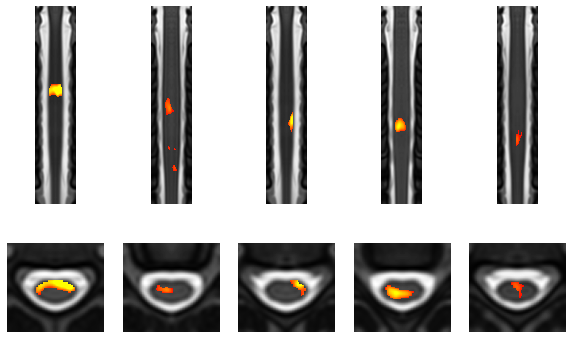

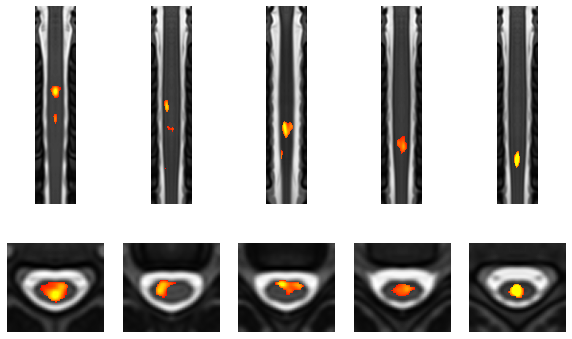

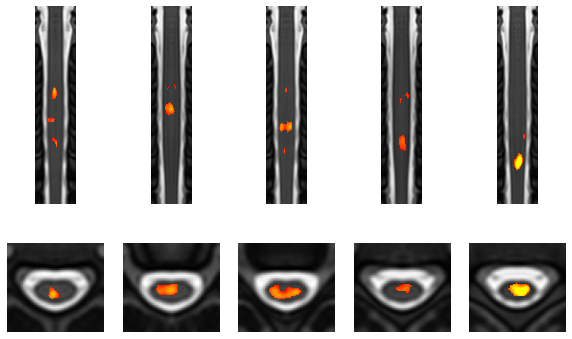

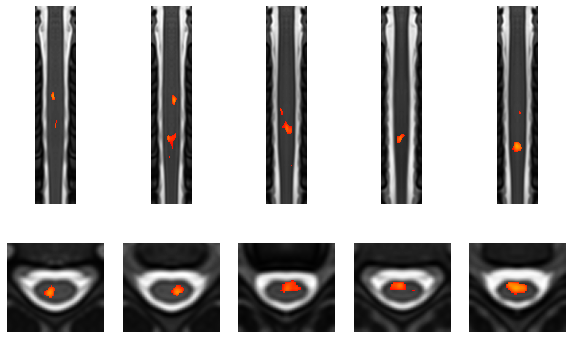

In [3]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
dataset="gva"; 
analysis='ica'
#config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/maps/"
if dataset=="gva":
    splits=["quart1","quart2","quart3","quart4"]
elif dataset=="mtl":
    splits=["half1","half2"]
    
for split in splits:
    config["data"][dataset][analysis]['spinalcord']['dir'] ="/ICA/results_spine_only/"+dataset+ "/spinalcord/split_volumes/"+ split

    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':analysis}
    #params_qual_2 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':"ica"}

    #plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=None)
    #plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=True)
    plotting = Plotting(config,'spinalcord',params1=params_qual_1)#,params2=params_qual_2)
    plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=False)

## `mtl` dataset

Sorting method: rostrocaudal (max value)
The plotting will be displayed in neurological orientation (Left > Right)
Sorting method: rostrocaudal (max value)
The plotting will be displayed in neurological orientation (Left > Right)


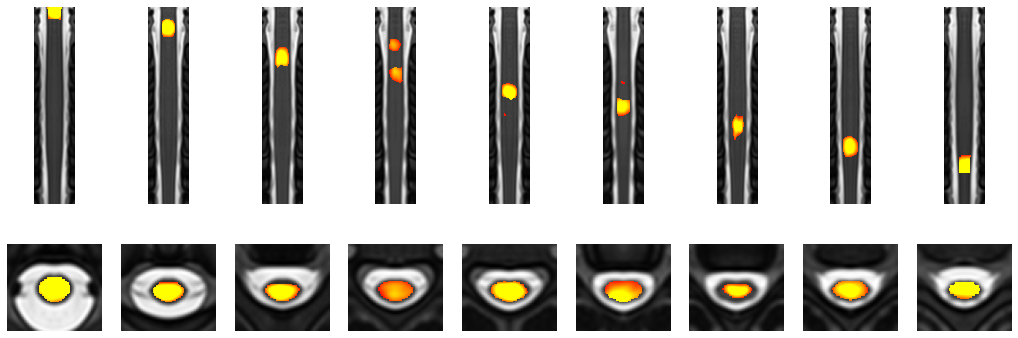

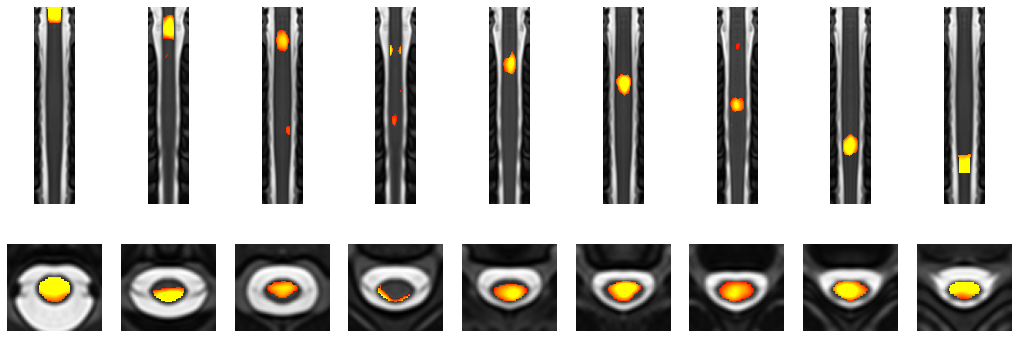

In [4]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
dataset="mtl"; 
analysis='ica'
#config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/maps/"
if dataset=="gva":
    splits=["quart1","quart2","quart3","quart4"]
elif dataset=="mtl":
    splits=["half1","half2"]
    
for split in splits:
    config["data"][dataset][analysis]['spinalcord']['dir'] ="/ICA/results_spine_only/"+dataset+ "/spinalcord/split_volumes/"+ split

    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':analysis}
    #params_qual_2 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':"ica"}

    #plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=None)
    #plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=True)
    plotting = Plotting(config,'spinalcord',params1=params_qual_1)#,params2=params_qual_2)
    plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1["k"], lthresh=1.5, uthresh=3, save_results=False)

### <font color=#00988c> I.2  </font> Visualizing mtl components: each duration and analysis 

# <font color=#00988c> II. Quantitative analyses
### <font color=#00988c>  II.1 </font> Calculate Similarity between each splits
## `gva` dataset

In [24]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="mtl"; 
analysis='ica'
#config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/maps/"
if dataset=="gva":
    splits=["quart1","quart2","quart3","quart4"]
elif dataset=="mtl":
    splits=["half1","half2"]

params_quant_gva_ica={}
for split in splits:
    config["data"][dataset][analysis]['spinalcord']['dir'] ="/ICA/results_spine_only/"+dataset+ "/spinalcord/split_volumes/"+ split
    params_quant_gva_ica[split] = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)),  'dataset':dataset, 'analysis':analysis, 'lthresh':1.6}

params_quant_1 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)),'dataset':dataset, 'analysis':analysis,'t_range':["half1"]} 
params_quant_2 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)), 'dataset':dataset, 'analysis':analysis, 't_range': ["half1"]}

spine_analysis_robustness_gva = SpineOnlyAnalysis(config,params1=params_quant_2,params2=params_quant_1)
   

half1
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/split_volumes/half2half1/K_9/comp_zscored/*4D_z*


IndexError: list index out of range

METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 9 vs mtl_ica2 at K = 9 

Sorting method: rostrocaudal (max value)
The mean similarity is 1.00 ± 0.0


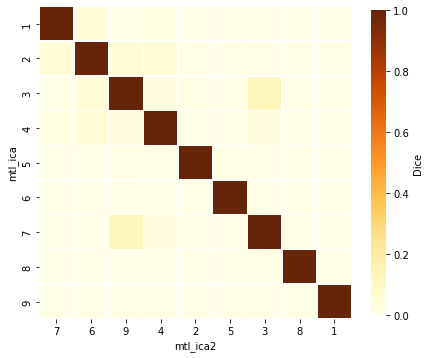

In [14]:
spine_analysis_robustness_gva.spatial_similarity(k1=9,similarity_method='Dice',save_figure=True)

In [ ]:

dataframe={}
extract=True# put extract=True to extract the values 
for dataset in ["gva"]:
    dataframe[dataset]={};
    for ana in ["ica_duration"]:
        dataframe[dataset][ana]={};
        
        for measure in ["Dice"]:#,"EuclideanDistance"]:
            config["output_dir"]= "/ICA/results_spine_only/results/duration_analyses/" + dataset + "/"+measure +"/"
            config["output_tag"]= "Duration"
            if extract==True:
                params_quant_1 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)),'dataset':dataset, 'analysis':ana,'t_range':[config["data"][dataset][ana]["spinalcord"]["durations"][-1]]} 
                params_quant_2 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)), 'dataset':dataset, 'analysis':ana, 't_range': config["data"][dataset][ana]["spinalcord"]["durations"]}

                spine_analysis = SpineOnlyAnalysis(config,params1=params_quant_1,params2=params_quant_2)

                spine_analysis.spatial_similarity(k1=params_quant_1['k_range'][0],t_range1=config["data"][dataset][ana]["spinalcord"]["durations"][-1],t_range2=config["data"][dataset][ana]["spinalcord"]["durations"],similarity_method='Dice',
                                                  save_results=True,save_figure=True)

            input= glob.glob(config["main_dir"] +config["output_dir"] + config["output_tag"] + "*_" +ana+ "_*duration.txt")[0]
            
            
            dataframe[dataset][ana][measure]=pd.read_csv(input, header=0,sep=' ')
         
#frames=[dataframe["mtl"]["ica_duration"]["Dice"],dataframe["gva"]["ica_duration"]["Dice"],dataframe["mtl"]["icap_duration"]["Dice"],dataframe["gva"]["icap_duration"]["Dice"]]; frames=pd.concat(frames)


In [ ]:
 
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_robustness_gva_ica = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica', 'lthresh':1.6}
params_quant_robustness_gva_icap = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'icap', 'lthresh':1.6}

spine_analysis_robustness_gva = SpineOnlyAnalysis(config,params1=params_quant_robustness_gva_ica,params2=params_quant_robustness_gva_icap)

spine_analysis_robustness_gva.extract_voxels_nb(K=5,params=params_quant_robustness_gva_ica) 
spine_analysis_robustness_gva.extract_voxels_nb(K=5,params=params_quant_robustness_gva_icap) 

In [ ]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_robustness_mtl.spatial_similarity(k1=9,similarity_method='Dice',save_figure=True)